# Project: Investigate a Dataset - Real Case Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Descrion:
_-
This dataset comprises academic records for students collected from various directorates (مديريات), each containing several schools. It encompasses data for one academic year, spanning across two semesters, each further divided into four periods.

Each row in the dataset represents a student's academic performance in various subjects across different periods. The table below outlines the structure of the dataset:

| id | name                   | description                       |
|----|------------------------|-----------------------------------|
| 0  | SchoolID               | School Identifier                 |
| 1  | StudentID              | Student Identifier                |
| 2  | gender                 | Gender of the student             |
| 3  | birthdate              | Birthdate of the student          |
| 4  | class_type_name        | Class type name                   |
| 5  | SemesterID             | Semester Identifier               |
| 6  | CertificateDescription | Description of the certificate    |
| 7  | Arabic                 | Arabic subject score              |
| 8  | English                | English subject score             |
| 9  | Math                   | Math subject score                |
| 10 | IT                     | Information Technology score      |
| 11 | art                    | Art subject score                 |
| 12 | Religion               | Religion subject score            |
| 13 | Physicis               | Physics subject score             |
| 14 | Chemistry              | Chemistry subject score           |
| 15 | Physical               | Physical education score          |
| 16 | History                | History subject score             |
| 17 | science                | Science subject score             |

It's worth noting that the first two digits of the school ID encodSample e the directorate code.

**Analytics Questions**
-----------------------------------------------------------------------------
Q1. What is the average of students' academic records for each period?  
Q2. What is the average of students' academic records for each period in each directorate?  
Q3. What is the subject that has the best academic achievement for each directorate?
ement for each directorate?  
score             |


<a id='wrangling'></a>
## Data Wrangling

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df=pd.read_csv("student_ids.csv")

C:\Users\SS\AppData\Local\Temp\ipykernel_23148\1721454795.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("student_ids.csv")


### Dataset Exploration

In [5]:
#disply some rows from the beginning and the end of the dataset
df.head(7)

,SchoolID,StudentID,gender,birthdate,class_type_name_ar,SemesterID,CertificateDescription,Arabic,English,Math,IT,art,Religion,Physicis,Chemistry,Physical,History,science
0,26111110,212445012,1,8/6/2005,Academic,1,Period_One,40.0,48.0,20.0,56.0,92.0,52.0,56.0,32.0,84.0,60.0,28.00
1,26111110,212445012,1,8/6/2005,Academic,1,Period_Two,56.0,32.0,32.0,52.0,96.0,28.0,32.0,44.0,88.0,60.0,52.00
2,26111110,212445012,1,8/6/2005,Academic,2,Period_Three,60.0,56.0,44.0,68.0,100.0,64.0,36.0,84.0,88.0,44.0,56.00
3,26111110,212445012,1,8/6/2005,Academic,2,Period_Four,60.0,56.0,76.0,72.0,92.0,56.0,36.0,60.0,96.0,60.0,56.00
4,26331746,212445507,2,8/13/2005,Academic,1,Period_One,86.0,70.0,66.0,88.0,100.0,100.0,90.0,96.0,92.0,100.0,88.00
5,26331746,212445507,2,8/13/2005,Academic,1,Period_Two,92.0,66.0,70.0,88.0,84.0,92.0,66.0,76.0,96.0,100.0,81.52
6,26331746,212445507,2,8/13/2005,Academic,2,Period_Three,90.0,88.0,84.0,88.0,100.0,100.0,84.0,88.0,92.0,92.0,78.00


In [6]:
df.tail(10)

,SchoolID,StudentID,gender,birthdate,class_type_name_ar,SemesterID,CertificateDescription,Arabic,English,Math,IT,art,Religion,Physicis,Chemistry,Physical,History,science
187709,23112007,4206000316,2,1/3/2005,Academic,2,Period_Three,32.0,60.0,28.0,32.0,64.0,20.0,56.0,32.0,80.0,32.0,56.0
187710,23112007,4206000316,2,1/3/2005,Academic,2,Period_Four,44.0,60.0,40.0,24.0,88.0,32.0,56.0,32.0,68.0,64.0,60.0
187711,23112007,4206011286,2,2/13/2005,Vocational,1,Period_One,40.0,44.0,28.0,72.0,80.0,22.0,NaN,NaN,92.0,56.0,NaN
187712,23112007,4206011286,2,2/13/2005,Vocational,1,Period_Two,32.0,44.0,32.0,36.0,80.0,24.0,NaN,NaN,96.0,32.0,NaN
187713,23112007,4206011286,2,2/13/2005,Vocational,2,Period_Three,68.0,48.0,28.0,36.0,80.0,24.0,NaN,NaN,96.0,36.0,NaN
187714,23112007,4206011286,2,2/13/2005,Vocational,2,Period_Four,60.0,40.0,56.0,36.0,84.0,24.0,NaN,NaN,96.0,76.0,NaN
187715,23112016,4221009466,1,5/10/2005,Academic,1,Period_One,12.0,28.0,16.0,14.0,84.0,8.0,20.0,32.0,68.0,16.0,16.0
187716,23112016,4221009466,1,5/10/2005,Academic,1,Period_Two,12.0,20.0,20.0,14.0,72.0,8.0,16.0,24.0,68.0,12.0,72.0
187717,23112016,4221009466,1,5/10/2005,Academic,2,Period_Three,12.0,16.0,20.0,16.0,88.0,28.0,36.0,44.0,60.0,12.0,36.0
187718,23112016,4221009466,1,5/10/2005,Academic,2,Period_Four,24.0,44.0,60.0,52.0,80.0,28.0,32.0,56.0,64.0,16.0,36.0


In [7]:
df.sample(100, random_state=42)

,SchoolID,StudentID,gender,birthdate,class_type_name_ar,SemesterID,CertificateDescription,Arabic,English,Math,IT,art,Religion,Physicis,Chemistry,Physical,History,science
8839,26111003,420995352,2,5/9/2005,Academic,1,Period_Two,48.0,36.0,36.0,84.0,80.0,64.0,60.0,32.0,88.0,96.0,68.0
92461,18111024,421708564,2,7/6/2005,Academic,2,Period_Four,72.0,80.0,92.0,92.0,92.0,88.0,88.0,100.0,68.0,100.0,72.0
57455,27111246,422034903,2,10/11/2005,Academic,2,Period_Three,32.0,16.0,24.0,24.0,84.0,34.0,18.0,16.0,88.0,36.0,28.0
49405,27112053,420700495,2,10/31/2004,Academic,2,Period_Three,86.0,72.0,64.0,88.0,96.0,100.0,64.0,80.0,92.0,88.0,92.0
41937,17111042,420944408,2,5/15/2005,Academic,1,Period_Two,38.0,56.0,18.0,16.0,52.0,44.0,28.0,28.0,80.0,44.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113634,25112052,420988621,2,5/8/2005,Academic,1,Period_Two,76.0,68.0,40.0,60.0,84.0,92.0,60.0,64.0,96.0,84.0,84.0
36371,22111010,420883210,1,12/3/2005,Academic,1,Period_One,12.0,60.0,60.0,52.0,84.0,20.0,28.0,72.0,88.0,28.0,60.0
20017,26111348,422288582,2,11/20/2005,Academic,1,Period_Two,56.0,54.0,60.0,52.0,88.0,60.0,52.0,56.0,92.0,60.0,44.0
162054,16112012,422218324,2,11/22/2005,Academic,1,Period_One,88.0,100.0,98.0,96.0,100.0,100.0,100.0,100.0,100.0,92.0,100.0


### How many rows conating Missing vlaues?

In [8]:
# Print the number of rows and the number of columns, get it to compare with missing in info.
print(f'# of rows {df.shape[0]:,}, # of columns {df.shape[1]}')

# of rows 187,719, # of columns 18


The dataset contains 187,719 rows and has 18 features.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187719 entries, 0 to 187718
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SchoolID                187719 non-null  int64  
 1   StudentID               187719 non-null  object 
 2   gender                  187719 non-null  int64  
 3   birthdate               187719 non-null  object 
 4   class_type_name_ar      187719 non-null  object 
 5   SemesterID              187719 non-null  int64  
 6   CertificateDescription  187719 non-null  object 
 7   Arabic                  186955 non-null  float64
 8   English                 186955 non-null  float64
 9   Math                    186955 non-null  float64
 10  IT                      185287 non-null  float64
 11  art                     186507 non-null  float64
 12  Religion                186955 non-null  float64
 13  Physicis                175195 non-null  float64
 14  Chemistry           

### What is the datatype of the dataset features?


In [10]:
df.dtypes

SchoolID                    int64
StudentID                  object
gender                      int64
birthdate                  object
class_type_name_ar         object
SemesterID                  int64
CertificateDescription     object
Arabic                    float64
English                   float64
Math                      float64
IT                        float64
art                       float64
Religion                  float64
Physicis                  float64
Chemistry                 float64
Physical                  float64
History                   float64
science                   float64
dtype: object

### What are the number of unique values in each feature?

In [11]:
df.nunique()

SchoolID                    855
StudentID                 46533
gender                        2
birthdate                  1316
class_type_name_ar            5
SemesterID                    2
CertificateDescription        4
Arabic                      385
English                     322
Math                        142
IT                          228
art                          54
Religion                    203
Physicis                    166
Chemistry                   197
Physical                     53
History                     127
science                     195
dtype: int64

### Describe the dataset


In [12]:
df.describe()

,SchoolID,gender,SemesterID,Arabic,English,Math,IT,art,Religion,Physicis,Chemistry,Physical,History,science
count,1.877190e+05,187719.000000,187719.000000,186955.000000,186955.000000,186955.000000,185287.000000,186507.000000,186955.000000,175195.000000,175195.000000,186815.000000,185287.000000,174611.000000
mean,1.945672e+07,1.556561,1.501159,66.364003,61.266842,59.585361,69.551547,85.738937,69.864256,60.905290,63.287573,87.018230,70.065202,66.621744
std,6.248214e+06,0.496792,0.500000,23.124984,23.931540,26.287695,24.365476,14.896551,24.335703,25.181114,25.657857,13.428037,24.701918,25.290243
min,1.011100e+07,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.311203e+07,1.000000,1.000000,52.000000,44.000000,40.000000,52.000000,82.000000,52.000000,44.000000,44.000000,84.000000,52.000000,48.000000
50%,1.811323e+07,2.000000,2.000000,68.000000,60.000000,60.000000,72.000000,88.000000,72.000000,60.000000,64.000000,88.000000,72.000000,68.000000
75%,2.611101e+07,2.000000,2.000000,84.000000,80.000000,82.000000,92.000000,96.000000,92.000000,84.000000,86.000000,96.000000,92.000000,88.000000
max,2.933699e+07,2.000000,2.000000,142.000000,144.000000,200.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [13]:
df[df['Math']>100]['Math'].count() # not outliers?

56

### Extract the age of the students 

In [14]:
## We have the information of the birth date, so we can use the date of birth and the current date to extract this information

#

### Data Cleaning

Your conclusion about the dataset from the EDA phase goes here:
1.
2.
3.


1. Data Types Convertion

In [27]:
df.SchoolID = df.SchoolID.astype('category')
df.gender = df.gender.astype('category')
df.birthdate = pd.to_datetime(df.birthdate)
df.class_type_name_ar = df.class_type_name_ar.astype('category')
df.SemesterID = df.SemesterID.astype('category')
df.CertificateDescription = df.CertificateDescription.astype('category')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187719 entries, 0 to 187718
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SchoolID                187719 non-null  category      
 1   StudentID               187719 non-null  object        
 2   gender                  187719 non-null  category      
 3   birthdate               187719 non-null  datetime64[ns]
 4   class_type_name_ar      187719 non-null  category      
 5   SemesterID              187719 non-null  category      
 6   CertificateDescription  187719 non-null  category      
 7   Arabic                  186955 non-null  float64       
 8   English                 186955 non-null  float64       
 9   Math                    186955 non-null  float64       
 10  IT                      185287 non-null  float64       
 11  art                     186507 non-null  float64       
 12  Religion                186955

2. Missing Data Handling

In [34]:
df.isnull().any() ## We have missing in the grades

SchoolID                  False
StudentID                 False
gender                    False
birthdate                 False
class_type_name_ar        False
SemesterID                False
CertificateDescription    False
Arabic                     True
English                    True
Math                       True
IT                         True
art                        True
Religion                   True
Physicis                   True
Chemistry                  True
Physical                   True
History                    True
science                    True
dtype: bool

In [48]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [49]:
df.isnull().any()

SchoolID                  False
StudentID                 False
gender                    False
birthdate                 False
class_type_name_ar        False
SemesterID                False
CertificateDescription    False
Arabic                    False
English                   False
Math                      False
IT                        False
art                       False
Religion                  False
Physicis                  False
Chemistry                 False
Physical                  False
History                   False
science                   False
dtype: bool

In [50]:
df.tail()

,SchoolID,StudentID,gender,birthdate,class_type_name_ar,SemesterID,CertificateDescription,Arabic,English,Math,IT,art,Religion,Physicis,Chemistry,Physical,History,science
187714,23112007,4206011286,2,2005-02-13,Vocational,2,Period_Four,60.0,40.0,56.0,36.0,84.0,24.0,60.90529,63.287573,96.0,76.0,66.621744
187715,23112016,4221009466,1,2005-05-10,Academic,1,Period_One,12.0,28.0,16.0,14.0,84.0,8.0,20.00000,32.000000,68.0,16.0,16.000000
187716,23112016,4221009466,1,2005-05-10,Academic,1,Period_Two,12.0,20.0,20.0,14.0,72.0,8.0,16.00000,24.000000,68.0,12.0,72.000000
187717,23112016,4221009466,1,2005-05-10,Academic,2,Period_Three,12.0,16.0,20.0,16.0,88.0,28.0,36.00000,44.000000,60.0,12.0,36.000000
187718,23112016,4221009466,1,2005-05-10,Academic,2,Period_Four,24.0,44.0,60.0,52.0,80.0,28.0,32.00000,56.000000,64.0,16.0,36.000000


3. Duplicates Handling

In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df.duplicated().any() ##

False

<a id='eda'></a>
## Exploratory Data Analysis
- Q1: groupby period aggreaget on average
- Q2: cut to get the governante as a column
- Q3: group by directorate aggregate on max?

In [16]:
## x-axis, y-axis, 
## AXV line? (histogram, others, to help in interpretartions)
## pd.cut (continuos to categories) (example: age to old, young, baby)

#### Questions: What is the average of students' academic records for each period?

In [77]:
subjects = df.iloc[:,7:]
df['student_average'] = subjects.mean(numeric_only=True,axis=1)
average_by_period = df.groupby('CertificateDescription')['student_average'].mean()
print(average_by_period)

CertificateDescription
Period_Four     74.555577
Period_One      68.170490
Period_Three    67.457132
Period_Two      66.312710
Name: student_average, dtype: float64


C:\Users\SS\AppData\Local\Temp\ipykernel_23148\3440224960.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('CertificateDescription')['student_average']
C:\Users\SS\AppData\Local\Temp\ipykernel_23148\3440224960.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_by_period = df.groupby('CertificateDescription')['student_average'].mean()


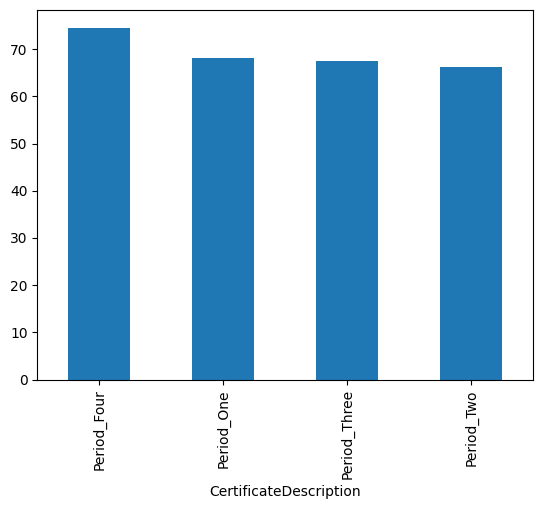

In [81]:
average_by_period.plot(kind='bar');

That is period four has the highest acedimical student average.

#### Q2: What is the average of students' academic records for each period in each directorate? 

In [106]:
df['directorate']= df.SchoolID.astype(str).apply(lambda x: x[0:2] ) ## extract the directoate ID
average_by_dir = df.groupby([ 'directorate', 'CertificateDescription'])['student_average'].mean().reset_index() ##
print(average_by_dir)

   directorate CertificateDescription  student_average
0           10            Period_Four        75.146025
1           10             Period_One        70.320389
2           10           Period_Three        68.089733
3           10             Period_Two        68.396259
4           11            Period_Four        76.834130
..         ...                    ...              ...
63          28             Period_Two        70.151565
64          29            Period_Four        77.596857
65          29             Period_One        70.689195
66          29           Period_Three        70.638805
67          29             Period_Two        69.659909

[68 rows x 3 columns]


C:\Users\SS\AppData\Local\Temp\ipykernel_23148\1181025598.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_by_dir = df.groupby([ 'directorate', 'CertificateDescription'])['student_average'].mean().reset_index() ##


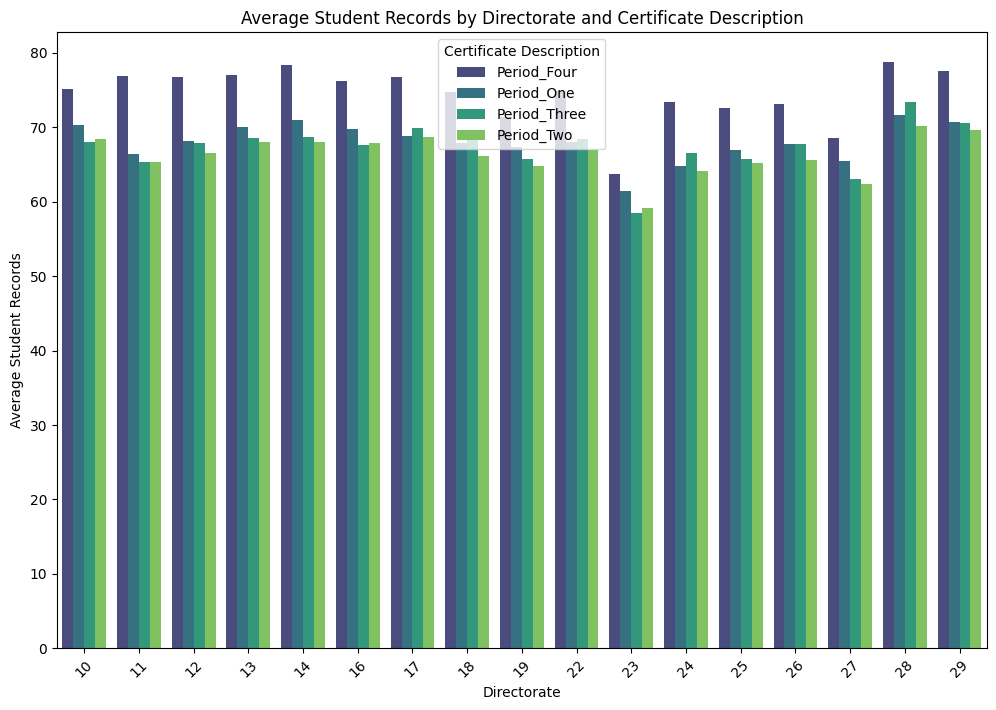

In [124]:
plt.figure(figsize=(12, 8))
sns.barplot(x='directorate', y='student_average', hue='CertificateDescription', data=average_by_dir, palette='viridis')
plt.title('Average Student Records by Directorate and Certificate Description')
plt.xlabel('Directorate')
plt.ylabel('Average Student Records')
plt.xticks(rotation=45)
plt.legend(title='Certificate Description')
plt.show()

#### Q3. What is the subject that has the best academic achievement for each directorate?
ement for each directorate?  
score    